<h1><center>Hsieh Model version 2</center></h1>


In [1]:
import os
os.getcwd()
os.chdir('D:\\Git projects\\college_works\\Thesis')

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from math import gamma
import time
import pandas as pd

In [2]:
def par():
    global beta, eta, varphi, theta, rho, i, r, gamma1, phi, kappa, alfa, psi, sig, pi, nu
    beta = 0.69
    eta = 0.25
    varphi = 0.25
    theta = 3.44
    rho = 0.19
    alfa = 0.6
    kappa = np.divide(1, (1- eta) )
    nu = 1 + np.multiply(alfa, np.multiply(varphi, kappa)) - np.divide(kappa, theta)
    pi = 1 - np.multiply(np.multiply( (1 - alfa), varphi), kappa )    
    sig = np.divide(np.multiply(eta, kappa), pi )
    psi = np.multiply(np.power(eta, eta), np.power( (1-eta), (1-eta) ) )
    i = 7
    r = 27
    gamma1 = gamma(   1 - np.multiply( np.divide(1, np.multiply(theta, (1-rho)) ), np.divide(1, (1 - eta) ) ) )   
    phi = np.array([0.138, 0.174, 0.136, 0.1, 0.051, 0.084, 0.168]).reshape(i, 1)




In [3]:

def taus2():
    par()
        
    tau_h = np.random.uniform(low=-0.99, high=40, size=(i,r))
    tau_h[0, :] = 0

    tau_w = np.random.uniform(low=-0.99, high=0.999, size=(i,r))
    tau_w[0, : ] = tau_w[0, 0]
    
    w =np.random.uniform(low=0.001, high=30, size=(i,r))
    w[0, r-1] = 1
    #w[1:6, :] = w[0, :] 
    
    x1 = np.array([tau_w, tau_h, w])
    
    return x1

x1 = taus2()

\begin{equation}\label{eq14}
s^* = \left(1 + \frac{1-\eta}{\beta \phi}\right)^{-1}
\end{equation}


In [4]:
def sf( ):
    global s
    s = np.power( (1+ np.divide( (1-eta), ( np.multiply(beta, phi) ) ) ), -1 )
    s = s.reshape(i, 1)
    return s

The fraction of teachers, $p_{tr}$, can be written as:


\begin{equation}	
p_{tr} = \frac{ \left[ \frac{1- \tau^w_{tr}}{(1 + \tau^h_{tr})^\eta} w_{tr} s_t^{\phi_t}(1-s_t)^{\frac{1-\eta}{\beta}} \right]^\theta} 
{\sum_{j=1}^N \left[ \frac{1 - \tau_{jr}^w}{(1 + \tau_{jr}^h)^\eta} w_{jr} s_j^{\phi_j} (1-s_j)^{\frac{1-\eta}{\beta}} \right]^\theta } 
\end{equation}

In [5]:
def p_trf(x1):    
    s = sf( )    
    A = np.divide( (1 - x1[0]) , np.power( ( 1 + x1[1] ), eta) )     
    b = np.power(s, phi ) 
    B = np.multiply(b.reshape(i,1), x1[2] )     
    C = np.power( (1 - s), np.divide((1-eta), beta) )
    d = np.multiply(np.multiply(A, B), C )
    k = np.power(d, theta)
    p_tr = np.divide( k[i-1], np.sum(k, axis=0) )
    return p_tr
 

The teacher's human capital is given by:

\begin{equation}
	H_{tr} = p_{tr}^{\frac{\nu}{\pi}} (s_t^{\phi_t} \eta^\eta)^{\frac{\kappa}{\pi}} 
\left( \frac{1-\tau_{tr}^w}{1+ \tau_{tr}^h} w_{tr}\right)^\sigma \gamma^\frac{1}{\pi}
\end{equation}

Where $\kappa = 1/(1 - \eta)$, $\pi = 1-(1-\alpha)\varphi\kappa$,  $\nu = 1+ \alpha\varphi\kappa -\theta\kappa$, and $\sigma = \frac{\eta \kappa}{\pi}$.



In [6]:
  
def H_trf(x1):    
    p_tr = p_trf(x1)  
    A = np.power(np.multiply( np.divide( (1 - x1[0]), (1 + x1[1]) ), x1[2] ), sig )    
    A = A[i-1]     
    P = np.multiply(np.power(p_tr, ( np.divide(nu, pi) )), np.power(eta, sig ) )
    g = np.divide(np.multiply(phi[i-1], kappa ), pi )
    C = np.multiply( np.power(s[i-1], g ), np.power(gamma1, np.divide(1, pi) ) )
    H_tr = np.multiply(np.multiply(P, A), C )       
    return H_tr


\begin{equation*}
\tilde{w}_{ir}= \psi  \left( \frac{1-\tau_{ir}^w }{(1+ \tau_{ir}^h)^\eta} w_{ir} \right)   (p_{tr}^{\alpha}H_{tr}^{1-\alpha})^{\varphi} s_i^{\phi_i}  (1-s_i)^{\frac{1-\eta}{\beta}} 
\end{equation*}
where $\psi = \eta^\eta(1-\eta)^{1-\eta}$. 
We can interpret $\tilde{w}_{ir}$ as a liquid reward for a person with mean ability from region $r$ and occupation $i$. So, $\tilde{w}_{ir}$ is composed by wage per efficiency unit in the occupation $w_{ir}$ schooling, teacher's human capital and frictions. 

In [7]:
def w_tilf(x1):
    H_tr = H_trf(x1) 
    p_tr = p_trf(x1)                 
    C = np.power((1 - s), np.divide( (1-eta), beta )).reshape(7, 1)
    pp = np.power(s, phi)        
    A = np.multiply(psi, np.multiply( np.divide( (1 - x1[0]), np.power( (1 + x1[1]), eta ) ), x1[2] ) )    
    b = np.power(np.multiply(np.power(p_tr, alfa), np.power(H_tr, (1-alfa) ) ), varphi )    
    B = np.multiply(b, pp.reshape(7,1))
    w_til =  np.multiply(np.multiply(A, B), C )
    return w_til 


\begin{equation}\label{eq17}
p_{ir} =  \frac{\tilde{w}_{ir}^\theta} {\sum_{j=1}^N \tilde{w}_{jr}^\theta}
\end{equation}

Where $p_{ir}$ is the fraction of people that work in occupation $i$ in region $r$

In [8]:

def p_irf(x1):    
    w_til = w_tilf(x1)
    w_til2 = np.power(w_til, theta) 
    w_r = w_til2.sum(axis = 0)    
    p_ir = np.divide(w_til2 , w_r ) 
    return np.array(p_ir), np.array(w_r)


Let $W_{ir}$ be the gross average earnings in occupation $i$ in region $r$. Then:

\begin{equation}\label{eq27}
W_{ir} = w_{ir}\mathbb{E}[h(e_{ir}, s_{i})\epsilon_i] = \frac{(1-s_i)^{-1/\beta}}{(1-\tau_{ir}^w)}\gamma \eta \left( \sum_{i=1}^N \tilde{w}_{ir}^\theta  \right)^{\frac{1}{\theta(1-\eta)}}
\end{equation}

Where $\gamma= \Gamma(1-(\theta(1-\rho))^{-1}(1-\eta)^{-1})$ is related to the mean of the Fréchet distribution for abilities.



In [9]:
def Wf(x1):
    p_ir, w_r = p_irf(x1)         
    z = np.multiply(np.multiply(gamma1, eta), np.power(w_r, np.divide(1, np.multiply(theta, (1 - eta)) ) ) )
    A = np.divide( np.power( (1 - s), (-1/beta) ), ( 1 - x1[0] )  )                
    W = np.multiply(A, z)
    return W, p_ir


Now I need import PNAD data.


In [10]:

def simul():
    global p_t, W_t
    p_t = pd.read_csv('pt.csv', sep=';')
    p_t = p_t.iloc[0:7]
    p_t.set_index('ocup', inplace=True)
    p_t = np.array(p_t)
    W_t = pd.read_csv('wt.csv', sep=';')
    W_t.set_index('ocup', inplace=True)
    W_t = np.array(W_t)
    
    return p_t, W_t

simul();



So, the problem consist in minimize equation below,  using L-BFGS-B. Others algorithms can be used, for example genetic algorithm.


\begin{equation}\label{eq28}
Dist = \sum_{i=1, r=1}^{N, R} \left(  \frac{W_{ir}^M - W_{ir}^T}{W_{ir}^T}  \right)^2 + \sum_{i=1, r=1}^{N, R} \left(  \frac{p_{ir}^M - p_{ir}^T}{p_{ir}^T}  \right)^2 
\end{equation}

In [18]:
# def obj2(x1):
#     tt = x1.reshape(3,5,r) 
#     ll = np.append(tt[0], tt[1,0:2,:] ).reshape(i,r)
#     jj = np.delete(tt[1], [0, 1], 0)
#     jj = np.append(jj, tt[2, 0:4, :]).reshape(i, r)
#     mm = np.delete(tt[2], [0, 1, 2, 3], 0)
#     x1 = np.array([ll, jj, mm])    
#     x1[0][0, :] = x1[0] [0, 0]    
#     x1[1][0, :] = 0
#     x1[2][0, r-1] = 1
#     W, p_ir = Wf(x1)
#     D =  (np.power(np.divide( (W-W_t), W_t ), 2) + np.power(np.divide( (p_ir-p_t), p_t ), 2) ).sum()
#     D = np.log(D)
#     return D

## Objective - EQ 31

p_t2 = np.array(p_t[0:6])
    
def obj2(x1):       
    x1 = x1.reshape((3, i, r)) 
    x1[0, 0, : ] = x1[0, 0, 0]    
    x1[1, 0, :] = 0
    x1[2, :, 16] = 8
    x1[2, 0:7, :] = x1[2, 0, :]
    W, p_ir = Wf(x1)    
    p_ir = p_ir[0:6]
    D =   (np.power(np.divide( (W-W_t), W_t ), 2)).sum() + (np.power(np.divide( (p_ir-p_t2), p_t2 ), 2)).sum() 
    D = np.log(D)    
    return D




In [22]:
#%time obj2(np.vstack(taus2()).flatten())
%time obj2(taus2())


Wall time: 635 µs


9.118743882345884

### Constraints

In [29]:


# optimization

Bd = ((-0.99, 0.999), )*189 + ((-0.99, 40), )*189 + ((0.001, 12), )*27
Bd = np.array(Bd, dtype=object)

def hessp(x, l):
    return np.zeros((3, i, r))


In [ ]:
# L-BFGS-B

cc = 0
def callback(x):
    global cc
    cc += 1
    fobj = obj2(x)
    print(f'\033[1;033mObjetivo: {np.around(fobj, 5)}, iter: {cc}') 

    
%time sol= minimize(obj2, taus2(),  method='L-BFGS-B', bounds = Bd, callback=callback, tol=1e-15, options={'maxiter':1e4, 'maxfun':1e1000})


In [23]:
# optimization give me z1 array

z1 = pd.read_excel('MG_8.xlsx')
z1 = np.array(z1).reshape(3, i, r)


obj2(z1)

-6.134934645971004

### Human Capital



\begin{equation}\label{eq23}
H_{ir} = p_{ir}\tilde{h}_{ir}\left( \frac{1-\tau_{ir}^w}{1+\tau_{ir}^h} w_{ir} \right)^{\frac{\eta}{1- \eta}} \mathbb{E} \left[\epsilon_i^{\frac{1}{1-\eta}} \bigg|\text{person choices $i$} \right]
\end{equation}

and

\begin{equation}\label{eq26}
\mathbb{E} \left[\epsilon_i^{\frac{1}{1-\eta}} \bigg|\text{person choices $i$} \right] =  \left(\frac{1}{p_{ir}} \right)^ {\frac{1}{\theta(1-\eta)}} \Gamma \left( 1 - \frac{1}{\theta(1-\rho)} \frac{1}{1-\eta} \right)
\end{equation}

Where $\gamma= \Gamma(1-(\theta(1-\rho))^{-1}(1-\eta)^{-1})$ is related to the mean of the Fréchet distribution for abilities. And $\tilde{h}_{ir} = [(p_{tr}^{\alpha}H_{tr}^{1-\alpha})^{\varphi} s_i^{\phi_i} \eta^\eta]^\kappa$. 

In [24]:
def h_tilf(x1):
    H_tr = H_trf(x1) 
    p_tr = p_trf(x1) 
    A = np.power(np.multiply(np.power(p_tr, alfa), np.power(H_tr, (1-alfa) ) ), varphi )    
    B = np.multiply(np.power(s, phi), np.power(eta, eta) )
    h_til = np.power(np.multiply(A, B), kappa )
    return h_til

In [25]:
def H_irf(x1):
    p_ir = p_irf(x1)[0]
    h_til = h_tilf(x1)
    A = np.multiply(h_til, np.power(p_ir, (1-kappa/theta) ) )
    B = np.power(np.multiply( np.divide( (1 - x1[0]), (1 + x1[1]) ), x1[2] ), np.multiply(eta, kappa ) )       
    H_ir = np.multiply(np.multiply(A, B), gamma1 )
    return H_ir
    
    

The representative firm has the following production function:
\begin{equation}\label{eq4}
Y = \sum_{r=1}^R\sum_{i=1}^N A_r H_{ir}
\end{equation}


In [26]:


def Y_f(x1):
    H_ir = H_irf(x1) 
    Y = np.multiply(x1[2, 0, :], H_ir)
    return Y


    

In [27]:

# Model

W, p_ir = Wf(z1.reshape(3, i, r))
W = pd.DataFrame(W)
p_ir = pd.DataFrame(p_ir)

 
# PNAD data

p_t, W_t = simul()   
W_t =  pd.DataFrame(W_t)
p_t =  pd.DataFrame(p_t)


# get colnames

n = pd.read_csv('pt.csv', sep=';')
n = n.iloc[0:7]
n.set_index('ocup', inplace=True)
names = n.columns.str.strip("'")
names  = np.array(names).repeat(7) 



p_t = p_t.values.flatten() 
p_ir = p_ir.values.flatten()

W = W.values.flatten()
W_t = W_t.values.flatten()


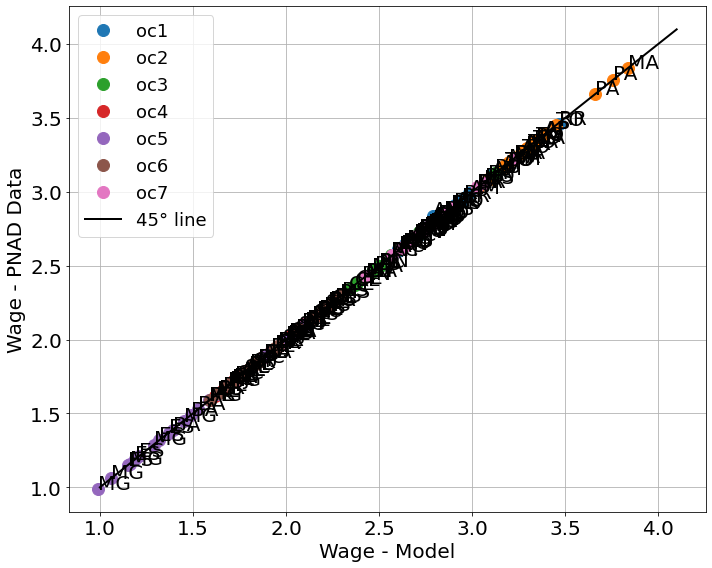

In [28]:
# plots


### W and W_ir

W_t =  pd.DataFrame(W_t)
W = pd.DataFrame(W)


W = W.values.flatten()
W_t = W_t.values.flatten()


ocn1 = ['oc1','oc2','oc3','oc4','oc5','oc6','oc7']
ocn1 = np.array(ocn1, dtype=object).repeat(27)

dd = pd.DataFrame(dict(x=W, y=W_t, label=ocn1))
groups = dd.groupby('label')

fig, ax = plt.subplots(figsize=(10,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for ocn1, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=ocn1)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for ii, txt in enumerate(names):
    ax.annotate(txt, (W[ii], W_t[ii]), size=20) 
ax.set_xlabel('Wage - Model', fontsize=20)
ax.set_ylabel('Wage - PNAD Data', fontsize=20)
ax.plot([1, 4.1], [1, 4.1], 'k-', lw=2, label='45° line')
ax.grid(True)
plt.tight_layout()    
ax.legend( prop={'size': 18})






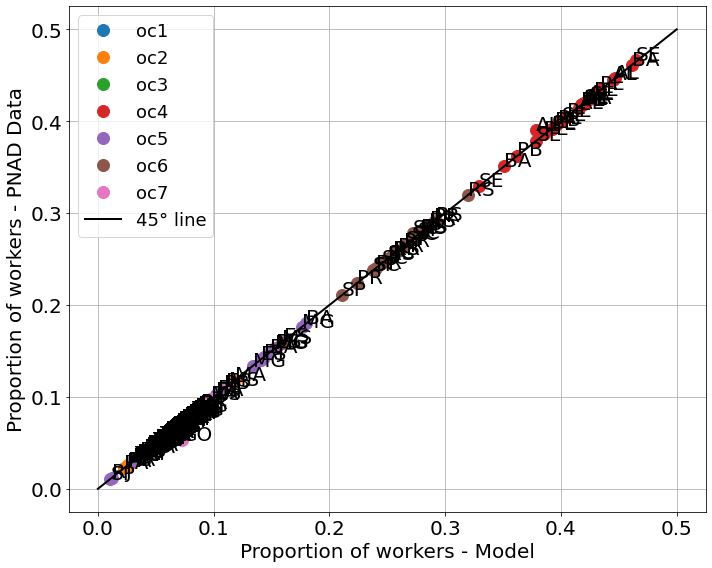

In [29]:
## p_ir and p_t

p_t =  pd.DataFrame(p_t)
p_ir = pd.DataFrame(p_ir)


p_t = p_t.values.flatten() 
p_ir = p_ir.values.flatten()

ocn = ['oc1','oc2','oc3','oc4','oc5','oc6','oc7']
ocn = np.array(ocn, dtype=object).repeat(27)


ff = pd.DataFrame(dict(x=p_ir, y=p_t, label=ocn))
groups2 = ff.groupby('label')

fig, ax = plt.subplots(figsize=(10,8))
ax.margins(0.05) 
for ocn, group in groups2:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=ocn)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for ii, txt in enumerate(names):
    ax.annotate(txt, (p_ir[ii], p_t[ii]), size=20) 
ax.set_xlabel('Proportion of workers - Model', fontsize=20)
ax.set_ylabel('Proportion of workers - PNAD Data', fontsize=20)
ax.plot([0, 0.5], [0, 0.5], 'k-', lw=2, label='45° line')
ax.grid(True)
plt.tight_layout()    
ax.legend( prop={'size': 18})


   



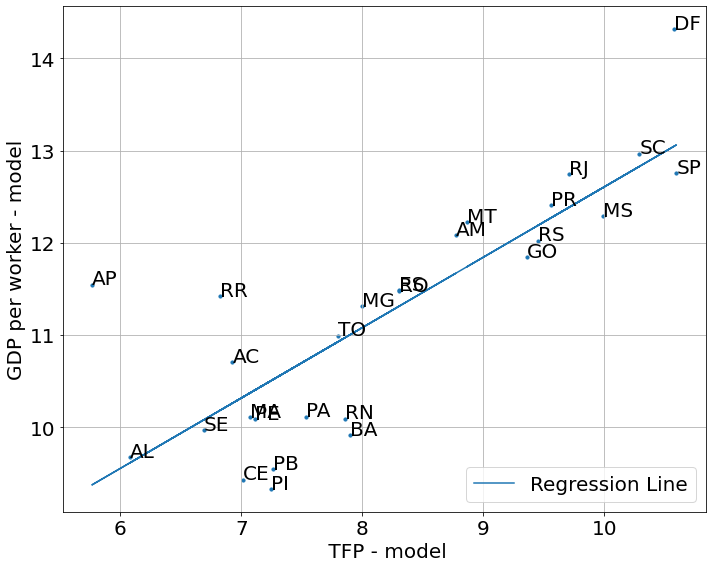

In [30]:

## tpf and GDP plots - fig 3

Y = Y_f(z1).sum(axis=0)
tpf = z1[2, 0, :]
names2 = n.columns.str.strip("'")

plt.subplots(figsize=(10,8))
plt.scatter(tpf, Y, s=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
(m, b) = np.polyfit(tpf, Y, 1)
yp = np.polyval([m, b], tpf)
plt.plot(tpf, yp, label='Regression Line')
for tt, txt in enumerate(names2):
    plt.annotate(txt, (tpf[tt], Y[tt]), size=20) 
plt.grid(True)
plt.legend(loc="lower right", prop={'size': 20})
plt.xlabel(" TFP - model", fontsize=20)
plt.ylabel("GDP per worker - model", fontsize=20)
plt.tight_layout()    
 

 

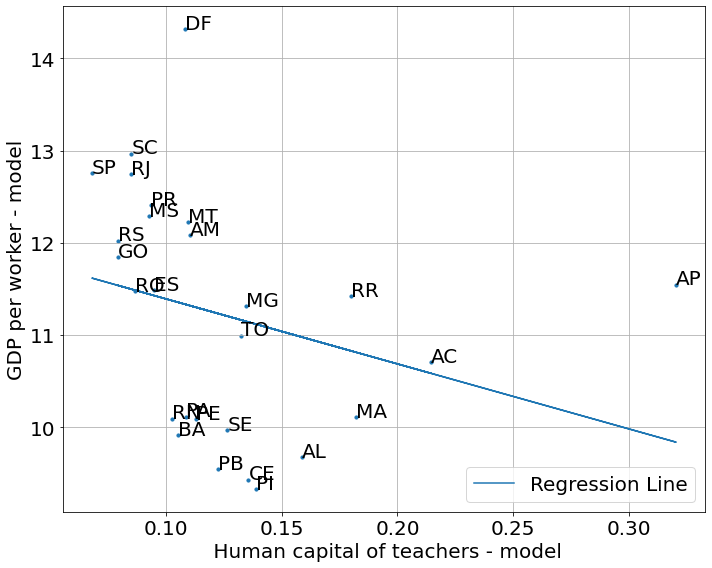

In [31]:

# gpd per worker and hc - fig5

H_tr = H_trf(z1)
Y = Y_f(z1).sum(axis=0)
names2 = n.columns.str.strip("'")

plt.subplots(figsize=(10,8))
plt.scatter(H_tr, Y, s=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
(m, b) = np.polyfit(H_tr, Y, 1)
yp = np.polyval([m, b], H_tr)
plt.plot(H_tr, yp, label='Regression Line')
for tt, txt in enumerate(names2):
    plt.annotate(txt, (H_tr[tt], Y[tt]), size=20) 
plt.grid(True)
plt.legend(loc="lower right", prop={'size': 20})
plt.xlabel(" Human capital of teachers - model", fontsize=20)
plt.ylabel("GDP per worker - model", fontsize=20)
plt.tight_layout()    




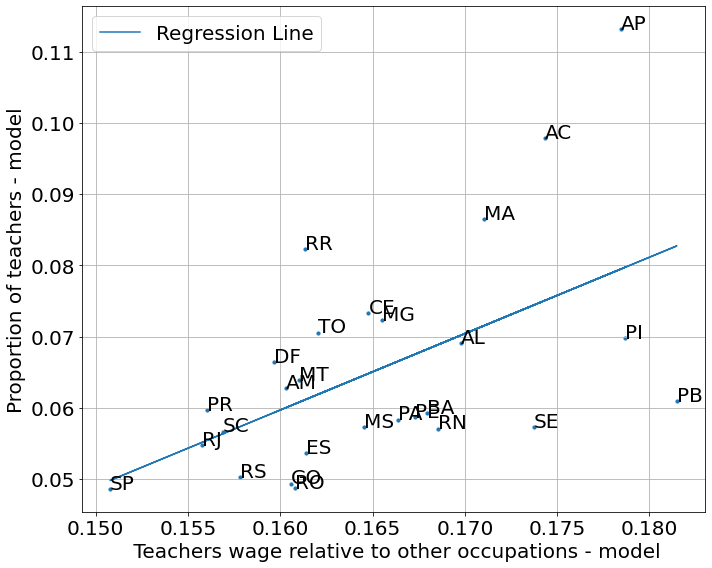

In [32]:

## p_ir x teachers wage - fig4


p_tr = p_trf(z1)

twg = np.array(W).reshape(i, r)[(i-1), :]/np.array(W).reshape(i, r).sum(axis=0)
 


names2 = n.columns.str.strip("'")

plt.subplots(figsize=(10,8))
plt.scatter(twg, p_tr, s=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
(m, b) = np.polyfit(twg, p_tr, 1)
yp = np.polyval([m, b], twg)
plt.plot(twg, yp, label='Regression Line')
for tt, txt in enumerate(names2):
    plt.annotate(txt, (twg[tt], p_tr[tt]), size=20) 
plt.grid(True)
plt.legend(loc="upper left", prop={'size': 20})
plt.xlabel(" Teachers wage relative to other occupations - model", fontsize=20)
plt.ylabel("Proportion of teachers - model", fontsize=20)
plt.tight_layout()    

  


 

## Effects of increase in distortions in GDP

In the next exercise, I will increase the distortions and verify if this affect GDP

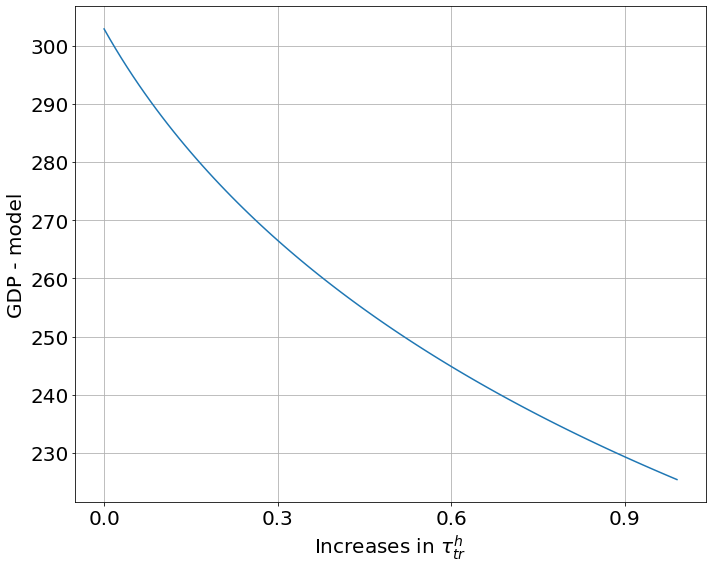

In [33]:
## increase one unit in tau_h and effect in gpd

dd = np.arange(0, 1, 0.01)

n = len(dd) 
Y_th = []


for nn in dd: 
    kk = np.array(z1, copy=True)
    g1 = kk[0] 
    kk[1, i-1, :] = kk[1, i-1, :] + nn
    g2 = kk[1]
    g3 = kk[2]
    G = np.array([g1, g2, g3])
    
    Y_th.append(Y_f(G).sum() )  
    

plt.subplots(figsize=(10,8))
plt.plot(dd, Y_th)
plt.xticks(np.arange(min(dd), max(dd)+0.2, 0.3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r"Increases in $\tau^h_{tr}$", fontsize=20)
plt.ylabel("GDP - model", fontsize=20)
plt.tight_layout()    



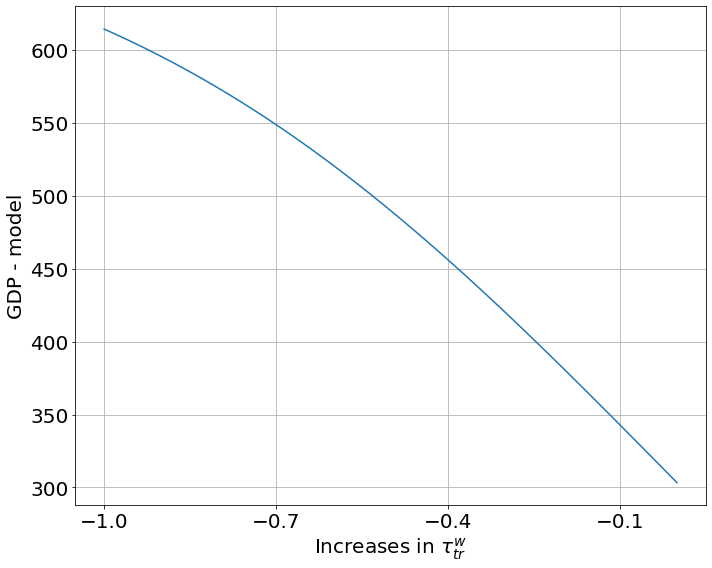

In [34]:

## increase one unit in tau_w and effect in gpd



bb = np.arange(-1, 0, 0.001)
n = len(bb) 
Y_tw = []


    
for nn in bb: 
    mm = np.array(z1, copy=True)
    mm[0, i-1, :] = mm[0, i-1, :] + nn
    c1 = mm[0]
    c2 = mm[1] 
    c3 = mm[2]
    C = np.array([c1, c2, c3])
    Y_tw.append(Y_f(C).sum())  
    
plt.subplots(figsize=(10,8))  
plt.plot(bb, Y_tw)
plt.xticks(np.arange(min(bb), max(bb)+0.2, 0.3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r"Increases in $\tau^w_{tr}$ ", fontsize=20)
plt.ylabel("GDP - model", fontsize=20)
plt.tight_layout()    



## Variation of GDP - Changing frictions of the highest and lowest ATHC

Now I put the frictions of AP and SP (highest and lowest ATHC) in all states to verify the effects on GDP. In the first case, the GDP increase, obviously, AP have lowest distortion. To SP, GDP decrease.  

GDP of all states before change frictions 302.90968750418307. 
 GDP of all states after change frictions 509.75301920860943 


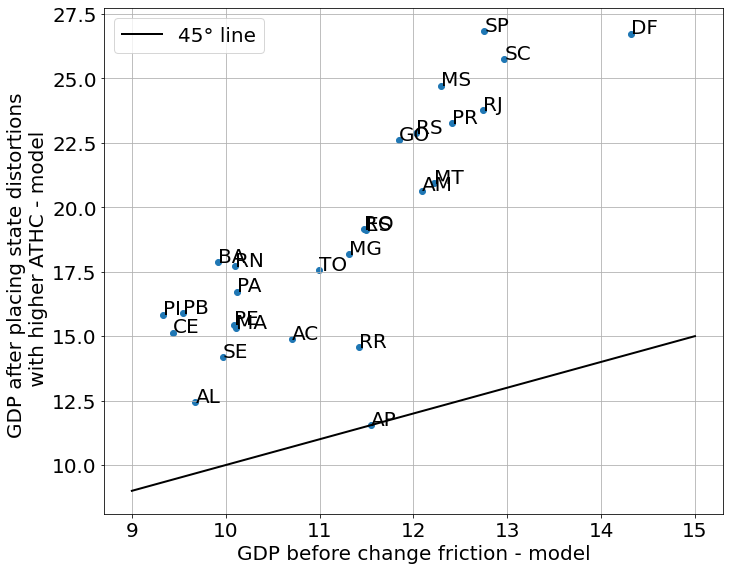

In [35]:
### exercise 1

gdp2 = Y_f(z1).sum(axis=0)
names2


names2[gdp2.argsort()[-3:][::-1]] # get 3 largest gdps


names2[np.argsort(H_trf(z1))[-3:][::-1]]  # get the 3 largest ATHC


 
# I put the frictions of AP because AP have the largest ATHC
 

jj = np.array(z1, copy=True)

for vv in range(27):
    jj[0, :, vv] = jj[0,:,5]


for vv in range(27):
    jj[1, :, vv] = jj[1,:,5]



gpd_z1 = Y_f(z1).sum(axis=0)
gpd_c = Y_f(jj).sum(axis=0)


plt.subplots(figsize=(10,8))  
plt.scatter(gpd_z1, gpd_c)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
for tt, txt in enumerate(names2):
    plt.annotate(txt, (gpd_z1[tt], gpd_c[tt]), size=20)                                                    
plt.grid(True)
plt.xlabel("GDP before change friction - model", fontsize=20)
plt.ylabel('GDP after placing state distortions \n with higher ATHC - model', fontsize=20)
plt.tight_layout()    
plt.plot([9, 15], [9, 15], 'k-', lw=2, label='45° line')
plt.legend(loc="upper left", prop={'size': 20})


print(f'GDP of all states before change frictions {Y_f(z1).sum()}. \n GDP of all states after change frictions {Y_f(jj).sum()} ')

  

GDP of all states before change frictions 302.90968750418307. 
 GDP of all states after change frictions 242.4416190827584 


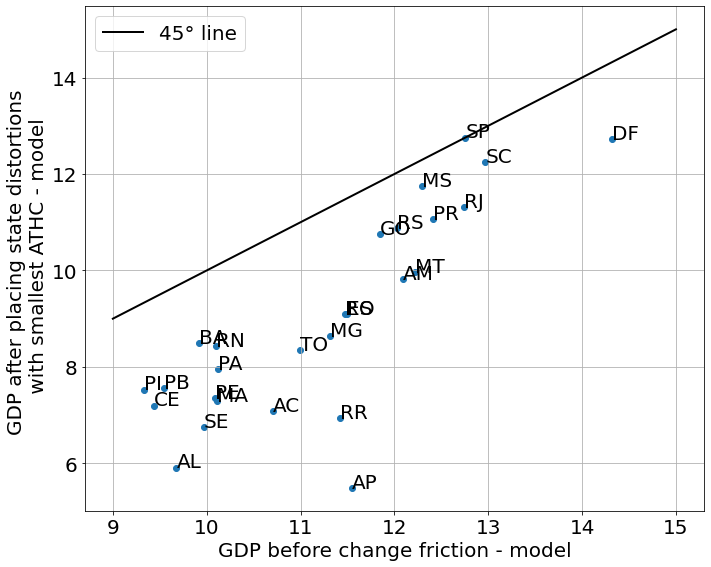

In [36]:

################### exercise 2


jj2 = np.array(z1, copy=True)




# the smallest ATHC is SP

names2[np.argmin(H_trf(z1))]



for vv in range(27):
    jj2[0, :, vv] = jj2[0,:,19]


for vv in range(27):
    jj2[1, :, vv] = jj2[1, :, 19]



gpd_z1 = Y_f(z1).sum(axis=0)
gpd_c2 = Y_f(jj2).sum(axis=0)

plt.subplots(figsize=(10,8))  
plt.scatter(gpd_z1, gpd_c2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for tt, txt in enumerate(names2):
    plt.annotate(txt, (gpd_z1[tt], gpd_c2[tt]), size=20)                                                    
plt.grid(True)
plt.xlabel("GDP before change friction - model", fontsize=20)
plt.ylabel('GDP after placing state distortions \n with smallest ATHC - model', fontsize=20)
plt.tight_layout()    
plt.plot([9, 15], [9, 15], 'k-', lw=2, label='45° line')
plt.legend(loc="upper left", prop={'size': 20})


print(f'GDP of all states before change frictions {Y_f(z1).sum()}. \n GDP of all states after change frictions {Y_f(jj2).sum()} ')




In [127]:
names2

Index(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB',
       'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS',
       'MT', 'GO', 'DF'],
      dtype='object')

# Variations in parameters

Now I will vary the parameters and verify the effects on GDP. First I will vary alfa.

### Variation in $\alpha$

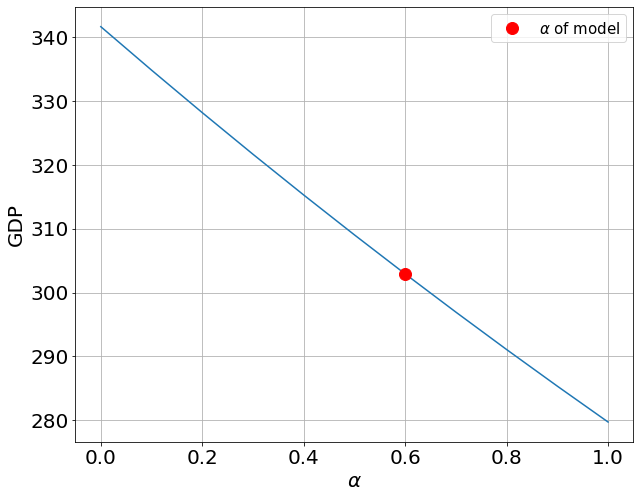

In [126]:
par()
gg = Y_f(z1).sum()


af = np.arange(0, 1.1, 0.1)
Y_af = []

for alfa in af:
    alfa = alfa
    Y_af.append(Y_f(z1).sum())
    

plt.subplots(figsize=(10,8))
plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(fontsize=20)
plt.ylabel("GDP", fontsize=20)
plt.xlabel(r"$\alpha$", fontsize=20)
plt.grid(True)
plt.plot(af, Y_af)    
plt.plot(0.6, gg,'ro', label=r'$\alpha$ of model', markersize=12) 
plt.legend(fontsize=15)
    

### Variation in $\rho$

When $\rho$ is large, the GDP increase  asymptotically.


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


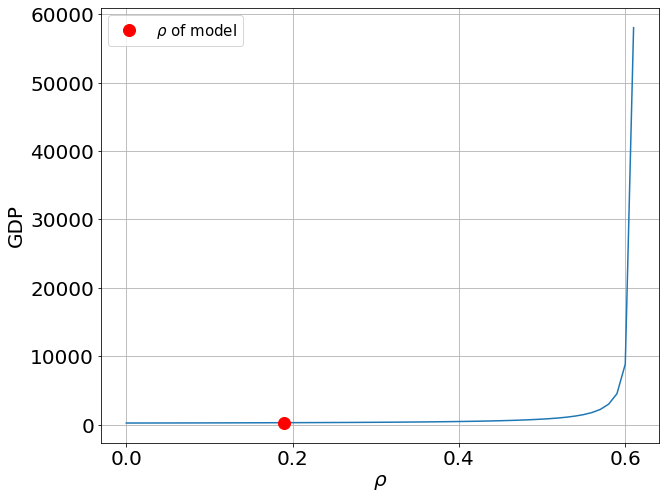

In [131]:
par()
gg = Y_f(z1).sum()


ro = np.arange(0, 0.8, 0.01)
Y_rho = []

for rho in ro:
    rho = rho
    gamma1 = gamma(   1 - np.multiply( np.divide(1, np.multiply(theta, (1-rho)) ), np.divide(1, (1 - eta) ) ) )   
    Y_rho.append(Y_f(z1).sum())
    

plt.subplots(figsize=(10,8))
plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 0.8, 0.2))
plt.yticks(fontsize=20)
plt.ylabel("GDP", fontsize=20)
plt.xlabel(r"$\rho$", fontsize=20)
plt.grid(True)
plt.plot(ro, Y_rho)    
plt.plot(0.19, gg,'ro', label=r'$\rho$ of model', markersize=12) 
plt.legend(fontsize=15)


### Variations in $\eta$

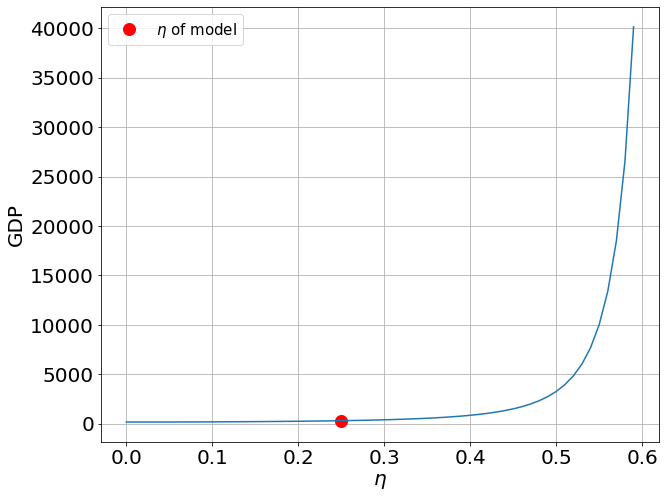

In [125]:
par()
gg = Y_f(z1).sum()


et = np.arange(0, 0.6, 0.01)
Y_eta = []

for eta in et:
    eta = eta
    kappa = np.divide(1, (1- eta) )
    sig = np.divide(np.multiply(eta, kappa), pi )
    psi = np.multiply(np.power(eta, eta), np.power( (1-eta), (1-eta) ) )
    gamma1 = gamma(   1 - np.multiply( np.divide(1, np.multiply(theta, (1-rho)) ), np.divide(1, (1 - eta) ) ) )
    Y_eta.append(Y_f(z1).sum())
    

plt.subplots(figsize=(10,8))
plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 1, 0.1) )
plt.yticks(fontsize=20)
plt.ylabel("GDP", fontsize=20)
plt.xlabel(r"$\eta$", fontsize=20)
plt.grid(True)
plt.plot(0.25, gg,'ro', label=r'$\eta$ of model', markersize=12) 
plt.plot(et, Y_eta)    
plt.legend(fontsize=15)

### Variations in $\varphi$

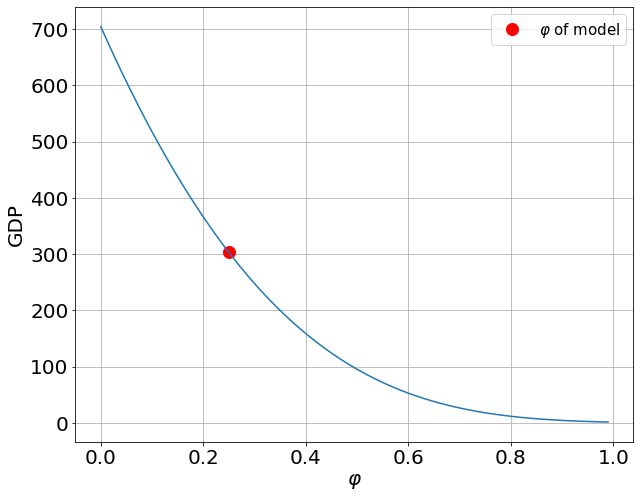

In [130]:
par()
gg = Y_f(z1).sum()


var = np.arange(0, 1, 0.01)
Y_varphi = []

for varphi in var:
    varphi = varphi
    nu = 1 + np.multiply(alfa, np.multiply(varphi, kappa)) - np.divide(kappa, theta)
    pi = 1 - np.multiply(np.multiply( (1 - alfa), varphi), kappa )    
    Y_varphi.append(Y_f(z1).sum())
    

plt.subplots(figsize=(10,8))
plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 1.2, 0.2) )
plt.yticks(fontsize=20)
plt.ylabel("GDP", fontsize=20)
plt.xlabel(r"$\varphi$", fontsize=20)
plt.grid(True)
plt.plot(0.25, gg,'ro', label=r'$\varphi$ of model', markersize=12) 
plt.plot(var, Y_varphi)    
plt.legend(fontsize=15)

### Variation in $\beta$

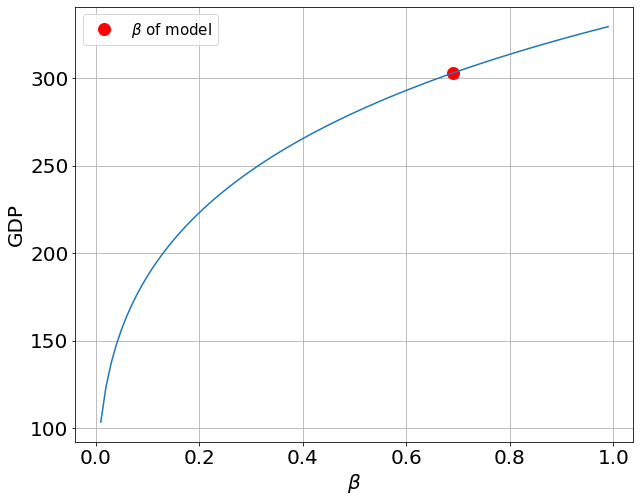

In [141]:
par()

gg = Y_f(z1).sum()


bt = np.arange(0.01, 1, 0.01)
Y_beta = []

for beta in bt:
    beta = beta
    Y_beta.append(Y_f(z1).sum())


plt.subplots(figsize=(10,8))
plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 1.2, 0.2) )
plt.yticks(fontsize=20)
plt.ylabel("GDP", fontsize=20)
plt.xlabel(r"$\beta$", fontsize=20)
plt.grid(True)
plt.plot(0.69, gg,'ro', label=r'$\beta$ of model', markersize=12) 
plt.plot(bt, Y_beta)    
plt.legend(fontsize=15)




### Variation in $\theta$

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


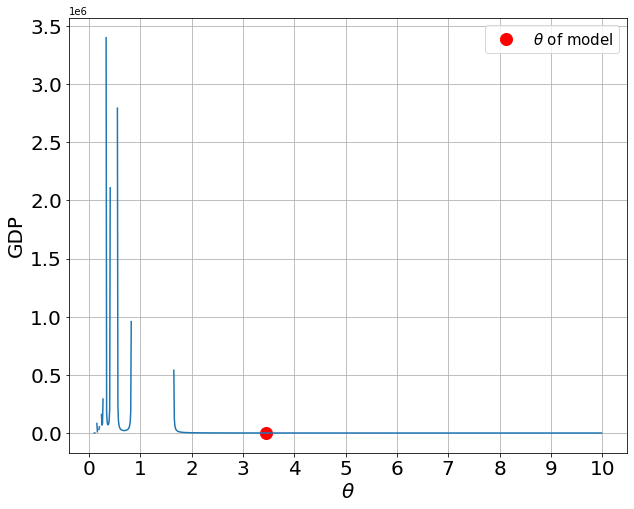

In [158]:
par()

gg = Y_f(z1).sum()


th = np.arange(0.1, 10, 0.01)
Y_theta = []

for theta in th:
    theta = theta
    nu = 1 + np.multiply(alfa, np.multiply(varphi, kappa)) - np.divide(kappa, theta)
    gamma1 = gamma(   1 - np.multiply( np.divide(1, np.multiply(theta, (1-rho)) ), np.divide(1, (1 - eta) ) ) )
#    p_trf(z1)
#    p_irf(z1)
#    H_irf(z1)
    Y_theta.append(Y_f(z1).sum())




plt.subplots(figsize=(10,8))
plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 10.1, 1) )
plt.yticks(fontsize=20)
plt.ylabel("GDP", fontsize=20)
plt.xlabel(r"$\theta$", fontsize=20)
plt.grid(True)
plt.plot(3.44, gg,'ro', label=r'$\theta$ of model', markersize=12) 
plt.plot(th, Y_theta)    
plt.legend(fontsize=15)


